# Project 1: Digit Classification with KNN and Naive Bayes

W207  <br />
Class: Thursday 6:30-8 PDT <br />
Student: Clayton Leach

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import random
import math
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. 
# The data is about 53MB so this cell should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the 
# number of data points and apply this permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
#Test data is 9,000 rows, dev data is 1,000,training is 60,000, mini train is 1000 subset of training
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [3]:
#len of a single training example is set of 28*28 pixel weights, matching len 784
len(mini_train_data[0])

784

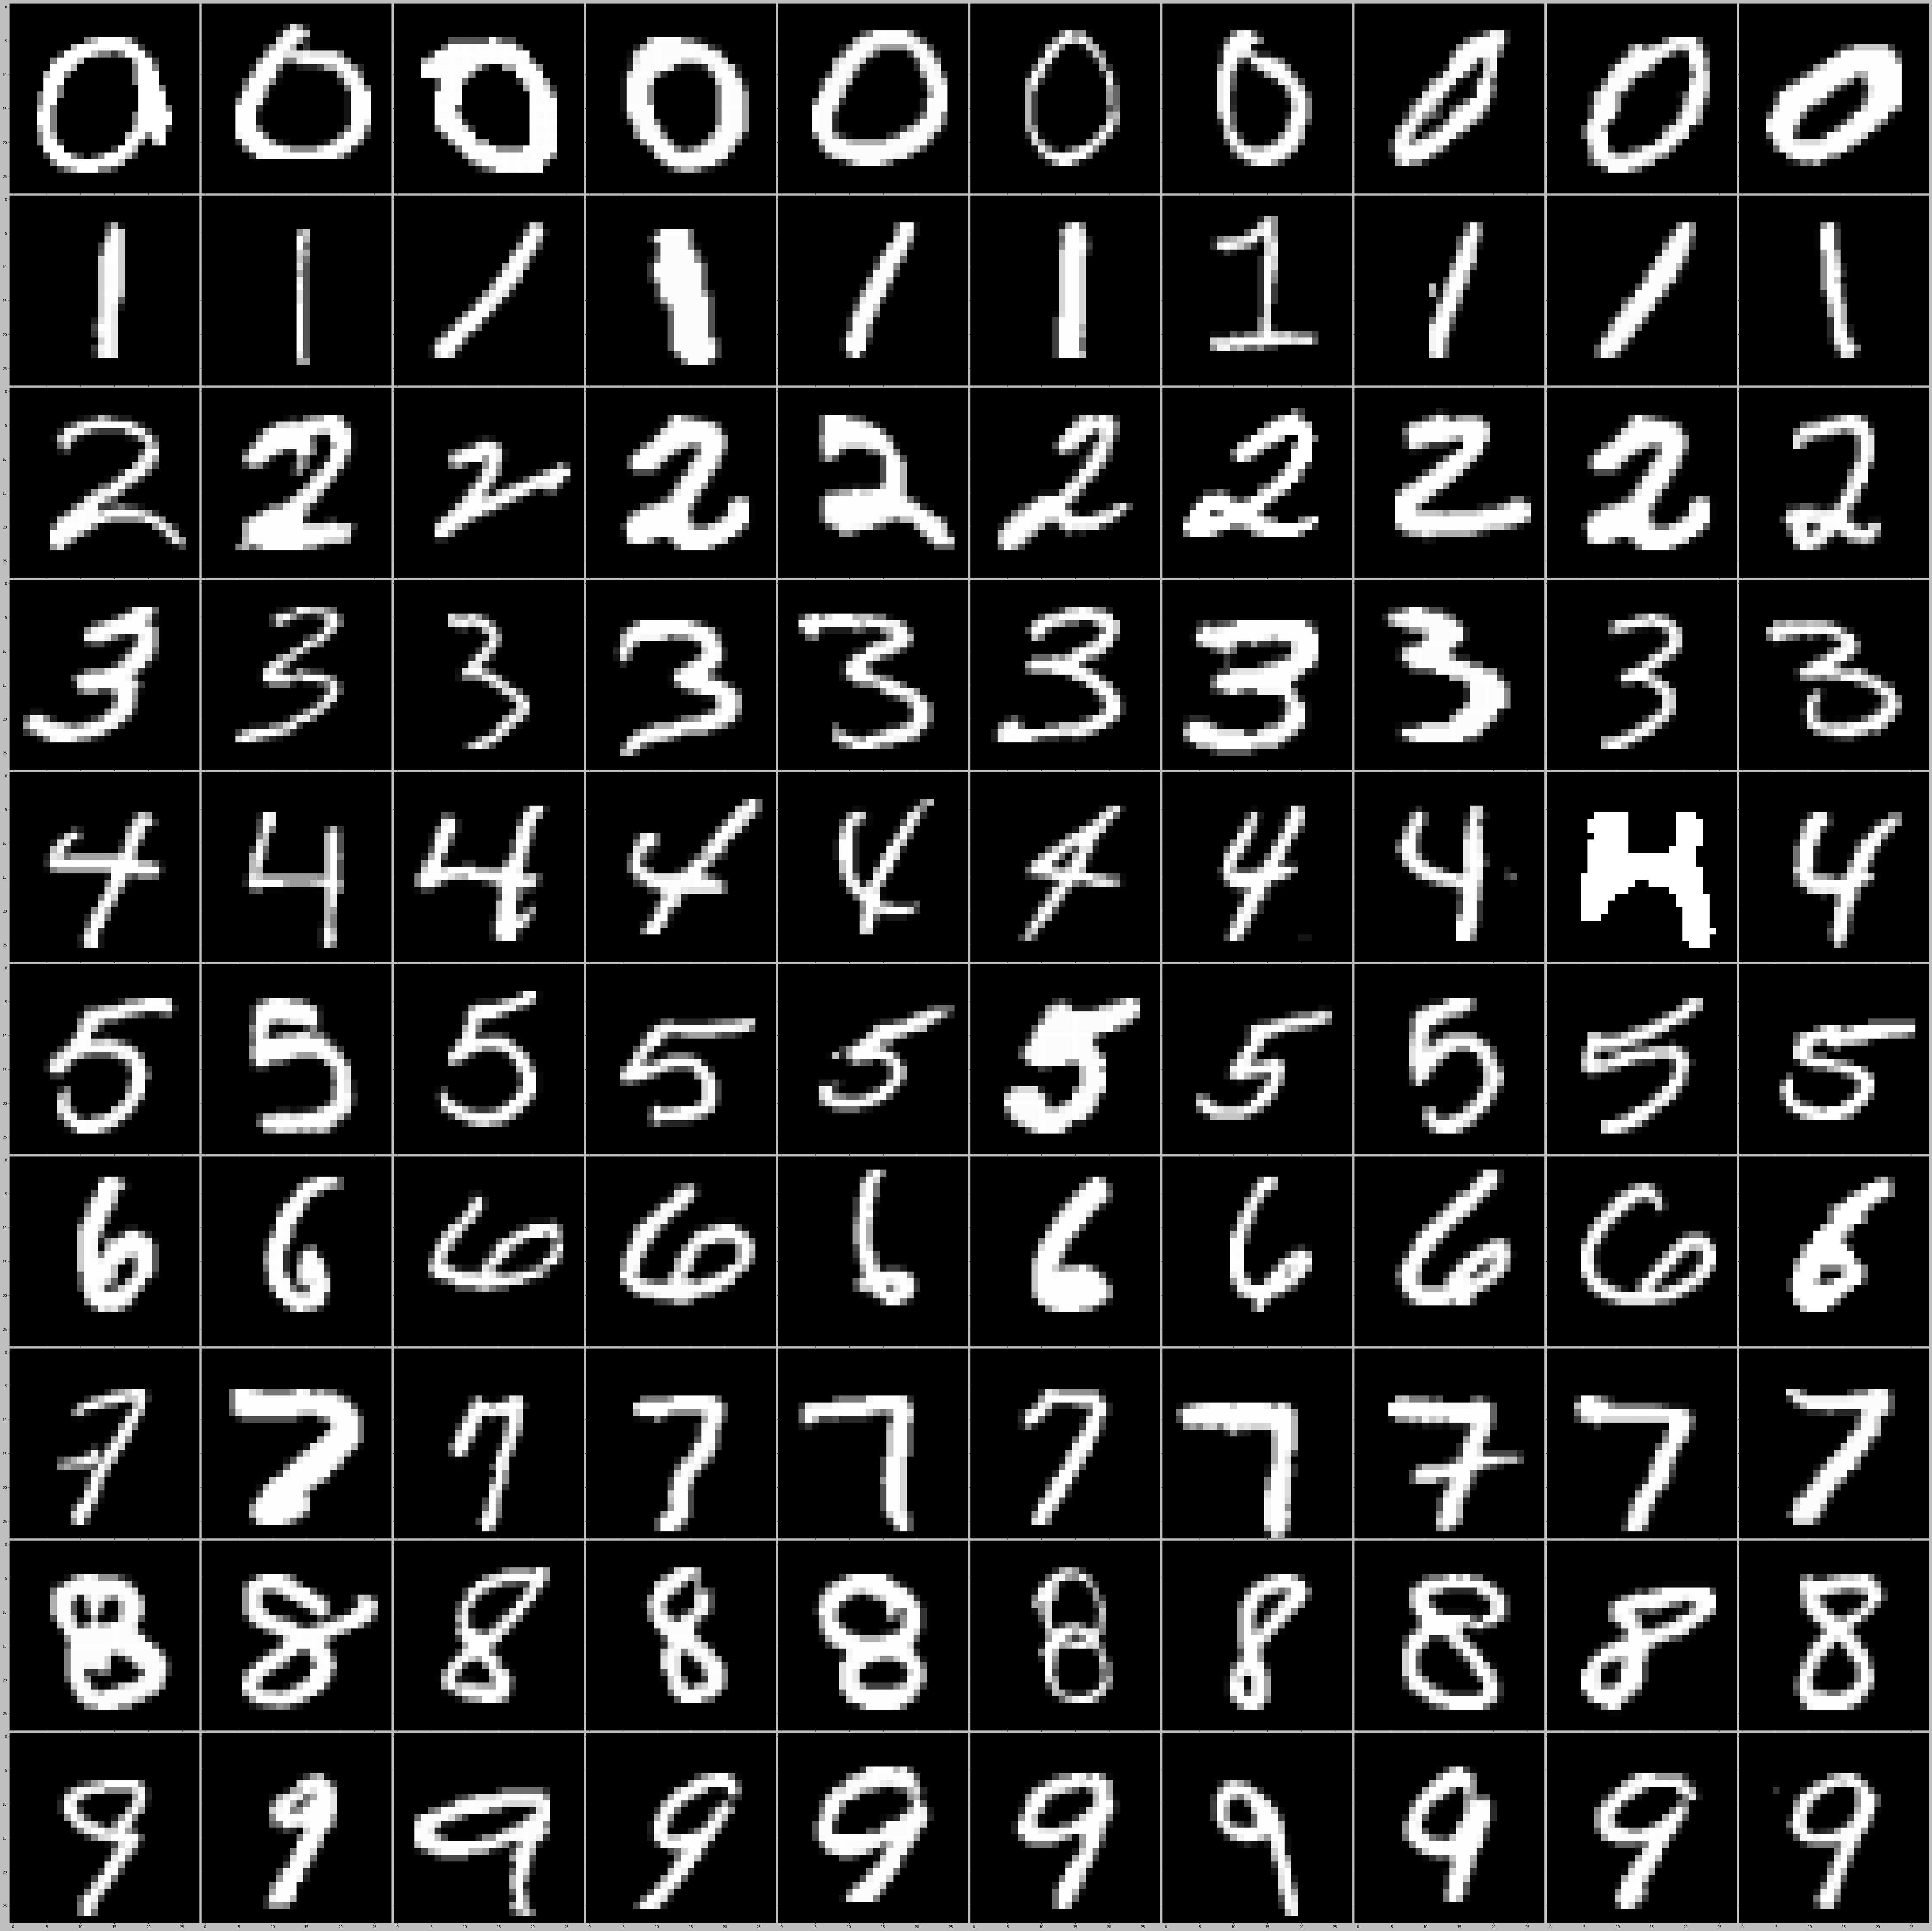

In [4]:
def print_digits(num_examples=10):
    """
    function to display variable number of examples of each digit (0-9)
    
    :param num_examples: The number of examples for each digit which will be shown
    """
    
    #initialize formats, examples list, and define realm of possible numbers
    digit_list = [x for x in range(0,10)]
    plt.style.use('grayscale')
    examples = []
      
    #initialize a matplotlib figure and an image grid to display output
    fig = plt.figure(figsize=(10*num_examples,10*num_examples))
    example_grid = ImageGrid(fig, 111,  # similar to subplot(141)
                     (10, num_examples),
                     axes_pad=0.1)
    
    #select random examples from the mini training data for each example
    for num in digit_list:
        options = [x for x in range(0,len(mini_train_labels)) if mini_train_labels[x] == num]
        selections = np.random.choice(options,num_examples)
        selected_rows = mini_train_data[selections]
        examples.append(selected_rows)
    
    #For each row, and each spot in that row
    for row in range(10):
        for col in range(num_examples):
            count = (row*num_examples) + col
            output = example_grid[count].imshow(examples[row][col].reshape(28,28))
    return 


print_digits(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def knn(k_values,features,labels,dev_features,dev_labels,report=True):
    """
    fit a knn model, and report model features on a dev set
    
    :param k_values: hyperparameter indicating number of neighbors for model to consider
    :param features: training feature set
    :param labels: training label set
    :param dev_features: dev feature set
    :param dev_labels: dev label set
    """
    
    #create class of KNN classifier with k equal to parameter, and fit model
    knn_model = KNeighborsClassifier(n_neighbors=k_values)
    knn_model.fit(features,labels)
    
    #knn "score" is accuracy, so don't need to specify accuracy_score
    accuracy = knn_model.score(dev_features,dev_labels)
    if report:
        print("Accuracy of dev data for %s nn is" %k_values, accuracy)
        if k_values==1:
            print(classification_report(dev_labels,knn_model.predict(dev_features)))
    
    return accuracy


k_values = [1, 3, 5, 7, 9]

for k_val in k_values:
    knn(k_val,mini_train_data,mini_train_labels,dev_data,dev_labels)


Accuracy of dev data for 1 nn is 0.888
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        99
         1.0       0.89      1.00      0.94       105
         2.0       0.99      0.79      0.88       102
         3.0       0.77      0.87      0.82        86
         4.0       0.89      0.82      0.85       104
         5.0       0.93      0.84      0.88        91
         6.0       0.94      0.96      0.95        98
         7.0       0.89      0.92      0.90       113
         8.0       0.94      0.88      0.91        96
         9.0       0.78      0.82      0.80       106

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

Accuracy of dev data for 3 nn is 0.878
Accuracy of dev data for 5 nn is 0.869
Accuracy of dev data for 7 nn is 0.865
Accuracy of dev data for 9 nn is 0.863


ANSWER: The f1-score attempts to provide a metric that takes both precision and recall into effect.  Based on that metric, the digit 9 is the most difficult. This is driven by the lowest precision score, and the 2nd (tied) lowest recall score among all digits.  In the event there was a very specific business case, we might opt to weight precision or recall more, changing which digit I would interpret as "most difficult".  

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
def knn_specific_sizes(train_sizes,train_data,train_labels,dev_data,dev_labels):
    """
    Calculates the accuracies and training times of a 1-nn given a list of training sizes
    
    :param train_sizes: list of integer sizes
    """
    accuracies = []
    times = []
    
    if not isinstance(train_sizes,list):
        print("Function requires a list argument")
        return
        
    for size in train_sizes:
        selected_indices = random.sample(range(len(train_data)),int(size))
        new_train_features = train_data[selected_indices]
        new_train_labels = train_labels[selected_indices]
        
        start_time = time.time()
        acc = knn(1,new_train_features,new_train_labels,dev_data,dev_labels,report=False)
        end_time = time.time()
        duration = end_time - start_time
        accuracies.append(acc)
        times.append(duration)
        
        print("The time taken for a training size of %s is %s and has an accuracy of %s " %(size,duration,acc))
        
    return accuracies,times
    
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies,times = knn_specific_sizes(train_sizes,train_data,train_labels,dev_data,dev_labels)

The time taken for a training size of 100 is 0.09577393531799316 and has an accuracy of 0.676 
The time taken for a training size of 200 is 0.18377900123596191 and has an accuracy of 0.787 
The time taken for a training size of 400 is 0.3754911422729492 and has an accuracy of 0.832 
The time taken for a training size of 800 is 0.7762489318847656 and has an accuracy of 0.869 
The time taken for a training size of 1600 is 1.5396788120269775 and has an accuracy of 0.909 
The time taken for a training size of 3200 is 3.1109588146209717 and has an accuracy of 0.931 
The time taken for a training size of 6400 is 6.3783581256866455 and has an accuracy of 0.938 
The time taken for a training size of 12800 is 13.537410974502563 and has an accuracy of 0.961 
The time taken for a training size of 25000 is 29.2369441986084 and has an accuracy of 0.964 


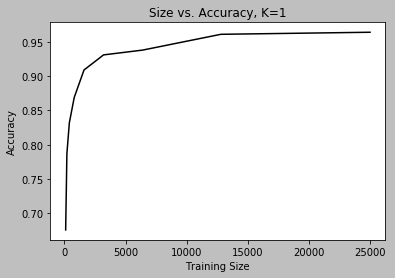

In [7]:
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title("Size vs. Accuracy, K=1")
plt.plot(train_sizes,accuracies)

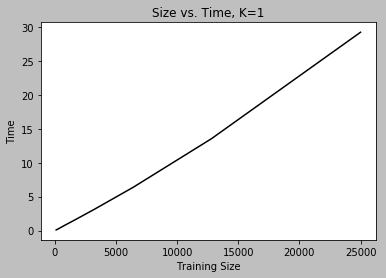

In [8]:
plt.xlabel('Training Size')
plt.ylabel('Time')
plt.title("Size vs. Time, K=1")
plt.plot(train_sizes,times)

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


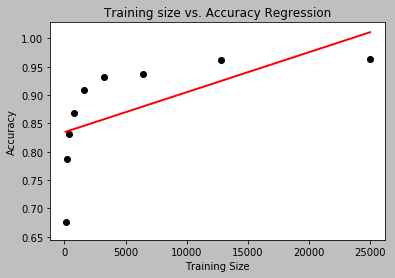

The model predicts an accuracy of 126.0% for a training size of 60,000


In [9]:
def accuracy_regression(sizes,accuracies,log=False):
    """
    Function to fit regression model for training sizes and accuracies
    :param sizes: list of training sizes (X)
    :param accuracies: list of accuracies (Y)
    """
    acc_regr = LinearRegression()
    acc_regr.fit(sizes, accuracies)
    
    predicted_accuracies = acc_regr.predict(sizes)
    
    plt.title("Training size vs. Accuracy Regression")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.scatter(sizes, accuracies,  color='black')
    plt.plot(sizes, predicted_accuracies, color='red', linewidth=2)
    plt.show()
   
    if log:
        print("The model predicts an accuracy of %s%% for a training size of 60,000" %(round(
                                            acc_regr.predict(np.array([math.log(60000)]).reshape(1,-1))[0],2)*100))
    else:
        print("The model predicts an accuracy of %s%% for a training size of 60,000" %(round(
                                            acc_regr.predict(np.array([60000]).reshape(1,-1))[0],2)*100))
  
    return

train_sizes_regression = [[x] for x in train_sizes]

#accuracies list passed in parameter is defined in previous cell
accuracy_regression(train_sizes_regression,accuracies)

ANSWER:  The problem with using a non-transformed linear regression model is that the form of this function is not in fact linear.  We can clearly see diminishing marginal returns to accuracy as training size increases, suggesting this form might better be represented logarithmically.  By extrapolating our model which is misspecified, we end up with a nonsensical prediction, as it is impossible to have an accuracy of greater than 100%.  In the cell below I rerun the regression, but with the form: $$y= \beta_0 + \beta_1log(x)$$

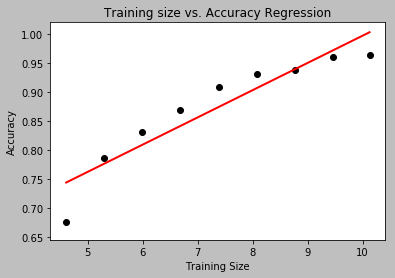

The model predicts an accuracy of 104.0% for a training size of 60,000


In [10]:
train_sizes_regression = [[math.log(x)] for x in train_sizes]
accuracy_regression(train_sizes_regression,accuracies,log = True)

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [11]:
def nn_confusion_matrix(features,labels,test_features,test_labels):
    """
    Train a 1-nn model and then returns a confusion matrix and predictions on test data
    """
    #create class of KNN classifier with k equal to parameter, and fit model
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(features,labels)
    
    predictions = knn_model.predict(test_features)
    cm = confusion_matrix(test_labels,predictions)
   
    return cm, predictions

conf_matrix, predictions = nn_confusion_matrix(train_data,train_labels,dev_data,dev_labels)

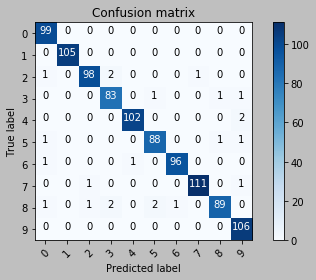

In [12]:
def plot_confusion_matrix(cm, classes, 
                          title='Confusion matrix',cmap=plt.cm.Blues):
    """
    Function to take in a confusion matrix (array form) and output
    a formatted version
    
    :param cm: confusion matrix as produced by confusion_matrix function
    :param classes: list of classes which correspond to confusion matrix (cm)
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return

classes=[x for x in range(0,10)]
plot_confusion_matrix(conf_matrix,classes)

$$F1 = 2*\frac{Precision*Recall}{Precision+Recall}$$

Using the below we can see that the most confused digit is 8 based on this scoring 
methodology as it has an f1 score of .9518, which is the lowest of all the digits.

In [13]:
precision = []
recall = []

#calculate precision and recall for each class (digit)
for x in range(0,10):
    precision.append(float(conf_matrix[x][x])/conf_matrix.sum(axis=0)[x])
    recall.append(float(conf_matrix[x][x])/conf_matrix.sum(axis=1)[x])

#convert lists to arrays and calculate F1 scores
precision = np.array(precision)
recall = np.array(recall)
f1_score = 2*(precision*recall)/(precision+recall)

#Print results of F1 score calculation
for x in range(0,10):
    print("The f1 score for digit",x,"is",f1_score[x])

The f1 score for digit 0 is 0.9801980198019802
The f1 score for digit 1 is 1.0
The f1 score for digit 2 is 0.9702970297029702
The f1 score for digit 3 is 0.9595375722543352
The f1 score for digit 4 is 0.9855072463768114
The f1 score for digit 5 is 0.967032967032967
The f1 score for digit 6 is 0.9846153846153847
The f1 score for digit 7 is 0.9866666666666667
The f1 score for digit 8 is 0.9518716577540107
The f1 score for digit 9 is 0.9769585253456221


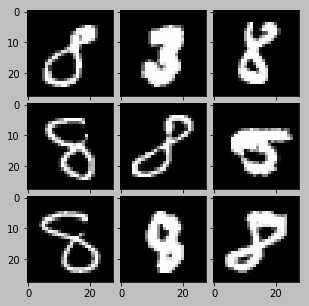

In [14]:
#First logic condition is false negatives while second is false positives
mistakes = dev_data[np.where(((dev_labels==8) & (predictions!=8)) | ((dev_labels!=8) & (predictions==8)))]
num_rows_needed = math.ceil(len(mistakes)/3)

#Create a matplotlib figure and an ImageGrid to display mistake output
fig = plt.figure(figsize=(5,5))
example_grid = ImageGrid(fig, 111,  # similar to subplot(141)
                 nrows_ncols=(num_rows_needed, 3),
                 axes_pad=0.1)


#For each row, and each spot in that row
for count in range(0,len(mistakes)):
        output = example_grid[count].imshow(mistakes[count].reshape(28,28))
    

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [15]:
def blur_pixels(features):
    """
    Takes in group of arrays length 784 and reshapes to 28*28; Recalculates 
    pixel values based on a weighted average of 9 pixels (itself and 8 surrounding)
    """
    final_list = []
    
    #Loop through every image(example) to recalculate pixel values
    for example in features:
        new_features = []
        reshaped = example.reshape(28,28)
       
        #For each pixel calculate logic of which surrounding pixels exist and calculate average
        for row in range(0,28):
            for col in range(0,28):
                temp_vals = []
                
                if col-1 < 0: 
                    col_left=False 
                else: 
                    col_left=True
                if col+1 >27: 
                    col_right=False 
                else: 
                    col_right=True
                if row-1<0: 
                    row_above=False 
                else: 
                    row_above=True
                if row+1>27:
                    row_below=False 
                else: 
                    row_below=True
                
                temp_vals.append(reshaped[row][col])
                if col_left: 
                    temp_vals.append(reshaped[row][col-1])
                if col_right: 
                    temp_vals.append(reshaped[row][col+1])
                if row_above: 
                    temp_vals.append(reshaped[row-1][col])
                if row_below: 
                    temp_vals.append(reshaped[row+1][col])
                if (col_left & row_above):
                    temp_vals.append(reshaped[row-1][col-1])
                if (col_left & row_below):
                    temp_vals.append(reshaped[row+1][col-1])
                if (col_right & row_above): 
                    temp_vals.append(reshaped[row-1][col+1])
                if (col_right & row_below): 
                    temp_vals.append(reshaped[row+1][col+1])
               
                new_val = sum(temp_vals)/len(temp_vals)
                
                new_features.append(new_val)
                
        final_list.append(new_features) 
    final_list = np.array(final_list)
    return final_list

#Blur our train and dev data
preprocessed_train = blur_pixels(train_data)
preprocessed_dev = blur_pixels(dev_data)

In [16]:
#Using several values of k see how our knn model performs under three 
#training/testing scenarios

k_vals =[1,3,5]
for k in k_vals:
    print("Output using k=%s nearest neighbors" %k)
    print("Output from preprocessed training, but not preprocessed dev")
    knn(k,preprocessed_train,train_labels,dev_data,dev_labels,report=True)
    print("Output from regular training and preprocessed dev")
    knn(k,train_data,train_labels,preprocessed_dev,dev_labels,report=True)
    print("Output where both training and dev are preprocessed")
    knn(k,preprocessed_train,train_labels,preprocessed_dev,dev_labels,report=True)
    print("")

Output using k=1 nearest neighbors
Output from preprocessed training, but not preprocessed dev
Accuracy of dev data for 1 nn is 0.982
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        99
         1.0       0.99      1.00      1.00       105
         2.0       0.99      0.96      0.98       102
         3.0       0.95      0.94      0.95        86
         4.0       0.99      0.99      0.99       104
         5.0       0.99      0.98      0.98        91
         6.0       1.00      0.98      0.99        98
         7.0       0.98      1.00      0.99       113
         8.0       0.99      0.96      0.97        96
         9.0       0.95      1.00      0.98       106

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Output from regular training and preprocessed dev
Accuracy of dev data for 1 nn is 0.962
              prec

ANSWER: Blurring the images, regardless of whether done to the training, dev, or both, drastically improves overall accuracy.  This makes sense intuitively: Most people draw similar looking numbers, but might differ in how big they write it, or the ratios of different parts of a number (e.g. length of top part of 7 to vertical portion).  By blurring the data it becomes more likely that the feature vector captures the general shape as more values will be non zero.  Interestingly, the highest accuracy measure came when we preprocessed the training data, but not the dev data, howevever the model where we preprocess both was only marginally worse.  

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

0.826


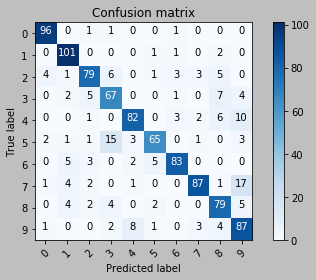

In [17]:
def naive_bayes(train_features,train_labels,dev_features,dev_labels,alpha=1):
    """
    Traings a bernoulli naive bayes model and returns predictions,
    confusion model, and model.
    """
    bernoulli_nb = BernoulliNB(binarize=0,alpha=alpha)
    bernoulli_nb.fit(train_features,train_labels)
    
    predictions = bernoulli_nb.predict(dev_features)
    nb_conf_matrix = confusion_matrix(dev_labels,predictions)
    print(accuracy_score(dev_labels,predictions))
    
    return predictions,nb_conf_matrix,bernoulli_nb

predictions, nb_conf_matrix, fitted_nb = naive_bayes(train_data,train_labels,dev_data,dev_labels)
plot_confusion_matrix(nb_conf_matrix,classes)

The accuracy of this multinomial naive bayes model is: 0.822


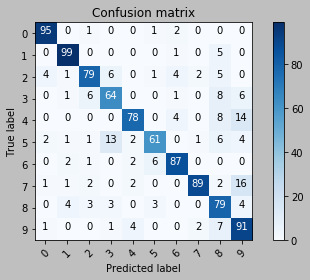

In [18]:
def mn_naive_bayes(train_features,train_labels,dev_features,dev_labels):
    """
    Produces multinomial naive bayes model and returns predictions and 
    confusion matrix for the dev features/labels.
    """
    #Set anything that is positive to 1, leaving white pixels as zero
    train_features = np.where(train_features>.75,2,train_features)
    dev_features = np.where(dev_features>.75,2,dev_features)
    
    train_features = np.where((train_features>0)&(train_features<1),1,train_features)
    dev_features = np.where((dev_features>0)&(dev_features<1),1,dev_features)
    
    mn_bernoulli_nb = MultinomialNB()
    mn_bernoulli_nb.fit(train_features,train_labels)
    
    predictions = mn_bernoulli_nb.predict(dev_features)
    nb_conf_matrix = confusion_matrix(dev_labels,predictions)
    print("The accuracy of this multinomial naive bayes model is:", accuracy_score(dev_labels,predictions))
    
    return predictions,nb_conf_matrix

predictions, mnb_conf_matrix = mn_naive_bayes(train_data,train_labels,dev_data,dev_labels)
plot_confusion_matrix(mnb_conf_matrix,classes)

ANSWER: The multinomial naive bayes does not appear to offer improvement over our initial model.  My guess is that because most values are zero, any deviation from zero represents an extreme event, and therefore the difference between a 1 and a 2 provides very little additional information other than what is contained in knowing the pixel is not 0.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [19]:
def alpha_grid_search(alphas,binarize,scoring_method):
    """
    Searches for optimal alpha value for a binarized bernoulli naive bayes
    model and returns the output from the GridSearchCV function
    
    :param alphas: list of alpha values to try
    :param binarize: list of binarize values to try
    :scoring_method: scoring method to be used in GridSearch
    """
    
    parameters = {'alpha':alphas,'binarize':binarize}
    scorer = make_scorer(scoring_method)
    bernoulli_nb = BernoulliNB()
     
    max_alpha_finder = GridSearchCV(bernoulli_nb, parameters,scoring=scorer,return_train_score=True)
    gs_output = max_alpha_finder.fit(train_data, train_labels)
    return gs_output

#I wrote function to take list for alphas instead of dict
#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
binarize = [0]
alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
nb = alpha_grid_search(alphas, binarize, accuracy_score)

/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/clayleach/p3env/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small w

In [20]:
nb.cv_results_

{'mean_fit_time': array([0.60700385, 0.58447003, 0.58313123, 0.63091874, 0.59443259,
        0.58784501, 0.59357039, 0.61890348, 0.58986688]),
 'std_fit_time': array([0.01937708, 0.00345731, 0.00378649, 0.04525591, 0.00717848,
        0.00378435, 0.00987192, 0.04013088, 0.00470543]),
 'mean_score_time': array([0.19531695, 0.14874188, 0.14917239, 0.14954368, 0.15320929,
        0.15198803, 0.14971685, 0.15083567, 0.14803076]),
 'std_score_time': array([0.05749763, 0.00028187, 0.00064553, 0.00066268, 0.00104654,
        0.00502908, 0.00060962, 0.00288654, 0.00157007]),
 'param_alpha': masked_array(data=[0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_binarize': masked_array(data=[0, 0, 0, 0, 0, 0, 0, 0, 0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill

In [21]:
print(nb.best_params_)

{'alpha': 0.0, 'binarize': 0}


ANSWER: The best value for alpha appears to be 0, with an accuracy of 83.35%.  Laplace smoothing in Niave Bayes prevents zero probabilites by adding instances of each feature.  It's likely this is adding confusion to the algorithm rather than helping it to generalize; this makes sense in the context of digit classification, as some pixels really should have a zero probability of being positive given the true class.  

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [22]:
def guassian_nb(training_data,training_labels,test_data,test_labels):
    """
    Trains a Gaussian Naive Bayes model and returns the model, 
    raw predictions, and predictions of class probabilities
    """
    #Initialize a GuassianNB model using var_smoothing
    guass_nb = GaussianNB(var_smoothing=1e-1)
    guass_nb.fit(training_data,training_labels)
    predictions = guass_nb.predict(test_data)
    prob_pred = guass_nb.predict_proba(test_data)
    print("The accuracy for the model is:",accuracy_score(test_labels,predictions))
    return guass_nb,predictions,prob_pred

gnb,predictions,probs = guassian_nb(train_data,train_labels,dev_data,dev_labels)

The accuracy for the model is: 0.812


ANSWER: Adjusting the "var_smoothing" paramter to 1e-1 increased the predictive accuracy of the model to 81.2%.  This parameter specifies a portion of the highest variance to be added to all feature variances.  This should help reduce extreme probabilities being derived when a pixel is non-zero.  Prior to this adjustment some variances were so small, that a single positive value for that feature would result in the class probability dropping precipitiously.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [23]:
def generate_digits(num_examples,train_features,
                    train_labels,dev_features,dev_labels):
    """
    Trains a bernoulli naive bayes model and then uses the class feature probabilities
    to generate and display new samples
    
    :param num_examples: The number of samples to be created and dispalyed for each digit
    """
    bernoulli_nb = BernoulliNB(binarize=0)
    fitted_bnb = bernoulli_nb.fit(train_features,train_labels)
    
    digit_list = [x for x in range(0,10)]
    final_list=[]
    for digit in digit_list:
        probs = np.exp(fitted_bnb.feature_log_prob_[digit])
        examples=[]
        for example in range(0,num_examples):
            new_digit=[]
            #For each pixel append either a 0 or 1, using the model feature probability
            for pixel in range(0,784):
                new_digit.append(np.random.binomial(1,probs[pixel]))
            examples.append(np.array(new_digit))
        final_list.append(examples)
  
    fig = plt.figure(figsize=(10*num_examples,10*num_examples))
    example_grid = ImageGrid(fig, 111,  # similar to subplot(141)
                     (10, num_examples),axes_pad=0.1)
    
    
    #For each row, and each spot in that row
    for row in range(10):
        for col in range(num_examples):
            count = (row*num_examples) + col
            output = example_grid[count].imshow(final_list[row][col].reshape(28,28))
    
    return final_list

final_list = generate_digits(20,train_data,train_labels,dev_data,dev_labels)

ANSWER:  The generated digits are surprisingly good in the sense that a human looking at them would correctly be able to identify the digit.  Since the vector is determined probabilistically, we see significantly more discontinuities in the pixels which is something we would not expect from a human writing (pencils/pens result in a continous pixel stream).  Additionally, because we are assigning a pixel either a value of 0 or 1, we see only white and black, as opposed to the original samples where pixels can take on any value between 0 and 1.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [24]:
def calibration_analysis(buckets, correct, total, 
                         train_features,train_labels,dev_features,dev_labels):
    """
    Takes list of probabily thresholds (buckets), and a list to count both
    correct and total instances for each probability bucket.
    
    :param buckets: list of probability "bins"
    :param correct: list to store correct counts for each bucket
    :param total: list to store total counts for each bucket
    """
    bernoulli_nb = BernoulliNB(binarize=0,alpha=1)
    bernoulli_nb.fit(train_features,train_labels)
    pred_prob = bernoulli_nb.predict_proba(dev_features)
    predictions = bernoulli_nb.predict(dev_features)
    
    #for each prediction calculate the probability associated with the predicted class.
    #If correct increment correct and total, otherwise increment total.
    for x in range(0,len(pred_prob)):
        try:
            max_prob = max(pred_prob[x])
            if max_prob<.5:
                bucket=.5
            else:
                bucket = max([val for val in buckets if val<=max_prob])
                
            bucket_index = buckets.index(bucket)
            if predictions[x]==dev_labels[x]:
                correct[bucket_index] +=1
                total[bucket_index] +=1
            else:
                total[bucket_index] +=1
        except:
            print("error")

        
        
    return correct,total

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

correct,total = calibration_analysis(buckets, correct, total,train_data,train_labels,test_data,test_labels)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total = 270    accuracy = 0.441
p(pred) <= 0.9000000000000    total = 559    accuracy = 0.470
p(pred) <= 0.9990000000000    total = 564    accuracy = 0.512
p(pred) <= 0.9999900000000    total = 527    accuracy = 0.636
p(pred) <= 0.9999999000000    total = 497    accuracy = 0.714
p(pred) <= 0.9999999990000    total = 510    accuracy = 0.759
p(pred) <= 0.9999999999900    total = 467    accuracy = 0.824
p(pred) <= 0.9999999999999    total = 201    accuracy = 0.836
p(pred) <= 1.0000000000000    total = 5405    accuracy = 0.964


ANSWER: At both the first (.5) and last(1.0) buckets the model appears to be (relatively) strongly calibrated, but as a whole the model can not be considered strongly calibrated given the extreme differentials between the accuracy and posterior bucket in most instances.  However, the model is certainly weakly calibrated, as each buckets accuracy is higher than the buckets preceeding it.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [25]:
def add_col_row_sums(feature_data):
    """
    add sum of rows and cols as features to a feature vector presumed
    to represent an image (28*28 pixels)
    """
    new_train = []
    new_features_only = []
    for example in feature_data:
        row_sums=[]
        col_sums=[]
        
        #For each row/colcalculate sum and add to list.
        #Append list to feature array
        for row in range(0,28):
            row_sums.append(sum(example[0+row*28:28+row*28]))
        temp = np.append(example,row_sums)
        new = np.array([row_sums])
        for col in range(0,28):
            selections = [col+(28*x) for x in range(0,28) ]
            col_sums.append(sum(example[selections]))
        new_train.append(np.append(temp,col_sums))
        new_features_only.append(np.append(new,col_sums))
    return new_train,new_features_only

def mnb_feature_improvement(train_features,train_labels,
                            dev_features,dev_labels):
    
    #Treat pixel features as binary, reflecting bernoulli naive bayes
    train_features = np.where(train_features>0,1,train_features)
    dev_features = np.where(dev_features>0,1,dev_features)
    
    #append row and col sums to each example in train and dev data
    new_train, train_nfo = add_col_row_sums(train_features)
    new_dev, dev_nfo = add_col_row_sums(dev_features)
    
    mn_bernoulli_nb = MultinomialNB()
    mn_bernoulli_nb.fit(new_train,train_labels)
    
    predictions = mn_bernoulli_nb.predict(new_dev)
    nb_conf_matrix = confusion_matrix(dev_labels,predictions)
    print("The accuracy of this multinomial naive bayes model is:", accuracy_score(dev_labels,predictions))
    
    return predictions,nb_conf_matrix


predictions, ec_conf_matrix = mnb_feature_improvement(train_data,train_labels,dev_data,dev_labels)

The accuracy of this multinomial naive bayes model is: 0.788


Answer:  Including the row and col totals was not enough to improve the model overall.  If I had more time to expand on this work I might also look at diagonal sums, as well as block sums.

End Project 1